# IMPORTING DEPENDENCIES

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# IMPORTING DATASET AND ANALYSIS
#HERE WE USE "Pima Indians Diabetes Database" DATASET FROM KAGGLE

In [35]:
diabetes_dataset=pd.read_csv("diabetes.csv")

In [36]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
#NUMBER OF ROWS AND COLUMS IN DATASET
diabetes_dataset.shape

(768, 9)

In [38]:
diabetes_dataset.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [39]:
sum(diabetes_dataset.duplicated())

0

In [40]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [42]:
d=diabetes_dataset.groupby('Outcome')[['Glucose','Outcome']].mean()
df=pd.DataFrame(data=d)
df.columns=df.columns.str.strip()

In [43]:
d.head()

,Glucose,Outcome
Outcome,,
0,109.980000,0.0
1,141.257463,1.0


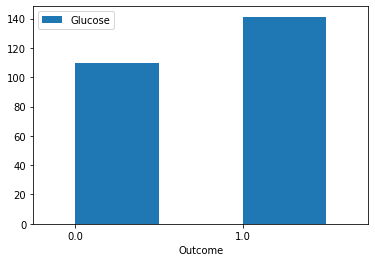

In [44]:
df.plot.bar(x="Outcome",y="Glucose",align='edge',rot=0)
plt.show()

In [45]:
print(df.columns)

Index(['Glucose', 'Outcome'], dtype='object')


# Data Standardization

In [46]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [47]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [49]:
scaler=StandardScaler()

In [50]:
x=scaler.fit_transform(x)
#This Give Standardrise Data for Input For Machine
y=diabetes_dataset['Outcome']

In [51]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Train and Test Data Split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [53]:
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)

In [54]:
# sns.countplot(x_train,y_train)


In [55]:
print(np.load('x_train.npy'))
print(np.load('y_train.npy'))

[[-0.54791859 -1.15469351 -3.57259724 ... -4.06047387 -0.50700636
  -1.04154944]
 [ 1.53084665 -0.27837344  0.66661825 ... -0.48135115  2.44666971
   1.4259954 ]
 [-0.84488505  0.56664949 -1.19450074 ... -0.41789153  0.55003518
  -0.95646168]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]]
[0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 

In [56]:
print(np.load('X_train.npy'),np.load('y_train.npy'))

[[-0.54791859 -1.15469351 -3.57259724 ... -4.06047387 -0.50700636
  -1.04154944]
 [ 1.53084665 -0.27837344  0.66661825 ... -0.48135115  2.44666971
   1.4259954 ]
 [-0.84488505  0.56664949 -1.19450074 ... -0.41789153  0.55003518
  -0.95646168]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]] [0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


# Let's Train The Model

In [58]:
classifire=svm.SVC(kernel='linear')

In [59]:
#Training the Support Vectore Machine Classifire on our data
classifire.fit(np.load('X_train.npy'),np.load('y_train.npy'))

SVC(kernel='linear')

# Model Evaluation 

In [60]:
#Accuracy Score on training data
x_train_prediction=classifire.predict(x_train)
training_data_aacuracy=accuracy_score(x_train_prediction,y_train)
print(x_train_prediction)
print(x_train)
#print(training_data_aacuracy)

[0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 1 

In [61]:
#Accuracy Score on testing data
x_testing_prediction=classifire.predict(x_test)
testing_data_aacuracy=accuracy_score(x_testing_prediction,y_test)
#print(testing_data_aacuracy)

In [62]:
print("Accuracy score of training model: ",training_data_aacuracy)
print("Accuracy score of testing model: ",testing_data_aacuracy)

Accuracy score of training model:  0.7719869706840391
Accuracy score of testing model:  0.7597402597402597


In [63]:
input_data=(1,155,90,3,40,15,0,30)

#Change a input from list to numpy array
input_data_as_numpy_array=np.asarray(input_data)
print(input_data_as_numpy_array)

input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

#stanardize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

prediction=classifire.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[  1 155  90   3  40  15   0  30]
[[-0.84488505  1.06740381  1.08020025 -1.10002803 -0.34557474 -2.15668519
  -1.42512243 -0.27575966]]
[0]
The person is not diabetic


C:\Users\Amar Patel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

In [65]:
y_val = y_test
y_pred = classifire.predict(x_train)
print(y_val.shape)
print(y_pred.shape)

(154,)
(614,)


In [67]:
# Create two arrays with different lengths


# Find the length of the shortest array
min_length = min(len(y_val), len(y_pred))

# Pad the arrays with zeros to match the length of the shortest array
y_val_equal= np.pad(y_val[:min_length], (0, min_length - len(y_val[:min_length])), mode='constant')
y_pred_equal = np.pad(y_pred[:min_length], (0, min_length - len(y_pred[:min_length])), mode='constant')

print(y_val_equal.shape)
print(y_pred_equal.shape)

(154,)
(154,)


In [68]:
cm=sklearn.metrics.confusion_matrix(y_val_equal,y_pred_equal)
print(cm)

# # Assuming y_test and y_pred are your actual and predicted labels respectively
# # Check the length of both arrays using the shape attribute
# if y_val.shape[0] == y_pred.shape[0]:
#     # Both arrays have the same length
#     sklearn.metrics.confusion_matrix(y_val, y_pred)
# else:
#     # Both arrays have different lengths, handle the error accordingly
#     print("Error: y_test and y_pred have different lengths")

[[65 34]
 [44 11]]


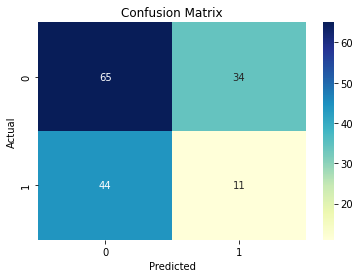

In [69]:
# sklearn.metrics.plot_confusion_matrix(classifire,arr1_padded,arr2_padded)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [70]:
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy: ",accuracy)

Accuracy:  0.4935064935064935


In [71]:
precision = precision_score(y_val_equal, y_pred_equal)
print("precision: ",precision)

precision:  0.24444444444444444


In [72]:
recall = recall_score(y_val_equal, y_pred_equal)
print("recall: ",recall)

recall:  0.2


In [73]:
#f1 score calculation
f1 = f1_score(y_val_equal, y_pred_equal)
print("F1 score: ",f1)

F1 score:  0.22000000000000003


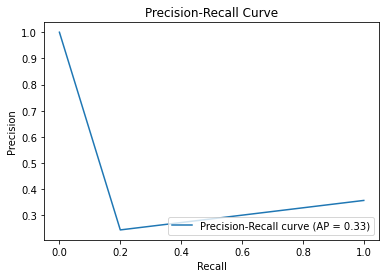

In [74]:
# calculate precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_val_equal, y_pred_equal)
avg_precision = average_precision_score(y_val_equal, y_pred_equal)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

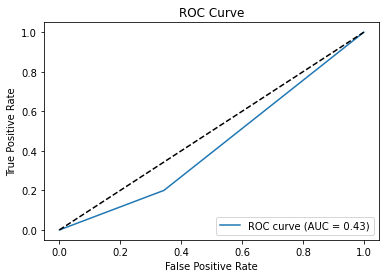

In [75]:

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val_equal, y_pred_equal)
auc_score = roc_auc_score(y_val_equal, y_pred_equal)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_val_equal, y_pred_equal))

              precision    recall  f1-score   support

           0       0.60      0.66      0.62        99
           1       0.24      0.20      0.22        55

    accuracy                           0.49       154
   macro avg       0.42      0.43      0.42       154
weighted avg       0.47      0.49      0.48       154



In [78]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [79]:
    import gradio as gr
import warnings

In [80]:
warnings.filterwarnings('ignore')

data = pd.read_csv('diabetes.csv')

x = data.drop(['Outcome'], axis=1)

y = data['Outcome']

# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x,y)

# from sklearn.preprocessing import StandardScaler

# #instantiate StandardScaler object
# scaler = StandardScaler()

# #scale data
# x_train_scaled = scaler.fit_transform(x_train)

# x_test_scaled = scaler.fit_transform(x_test)

#import model object
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(max_iter=1000,  alpha=1)

# #train model on training data
# model.fit(x_train_scaled, y_train)

def diabetes(Pregnancies, Glucose, Blood_Pressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree, Age):
#turning the arguments into a numpy array  

 x = np.array([Pregnancies,Glucose,Blood_Pressure,SkinThickness,Insulin,BMI,Diabetes_Pedigree,Age])

 prediction = classifire.predict(x.reshape(1, -1))

 return prediction

outputs = gr.outputs.Textbox()

app = gr.Interface(fn=diabetes, inputs=['number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a diabetes model")

app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
